# **DS-360**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Datasets/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


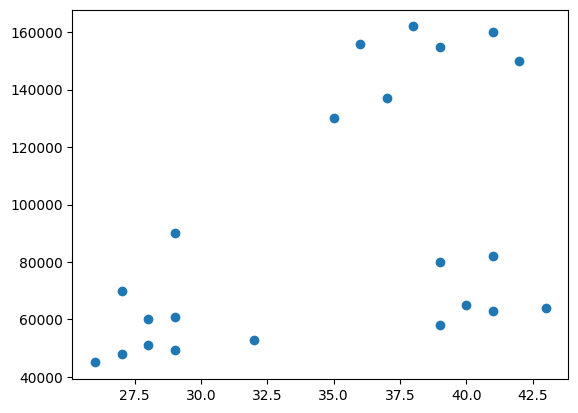

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

##  Min Max Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


## **ELBOW METHOD**

In [4]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[["Age", "Income($)"]])
    wcss.append(km.inertia_)

wcss

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.4201552205731443,
 0.29027734279782325,
 0.2343662648547235,
 0.2025441766905849,
 0.15205897076959982,
 0.11073569527418642]

In [22]:
km.inertia_

0.4750783498553096

In [23]:
centroids = km.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

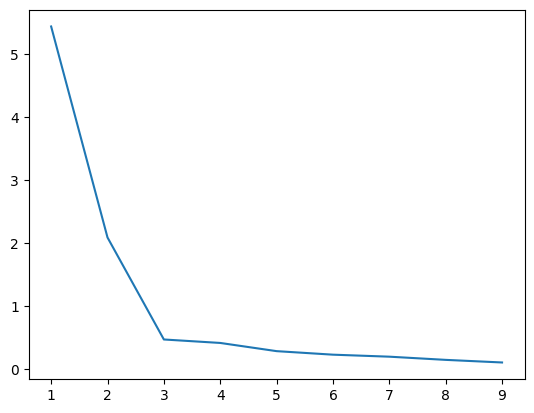

In [12]:
plt.plot(range(1,10),wcss)

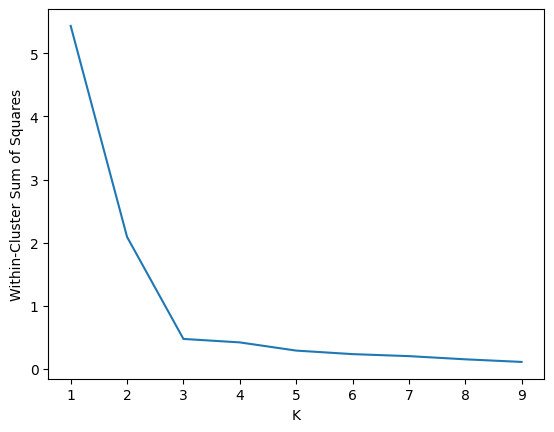

In [13]:
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Squares')
plt.plot(k_rng,wcss)
plt.show()

In [16]:
km = KMeans(n_clusters=3, n_init='auto')
y=km.fit(df_scaled[["Age", "Income($)"]])


In [18]:
y.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [19]:
km.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [20]:
df_scaled['Cluster'] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


<Axes: xlabel='Age', ylabel='Income($)'>

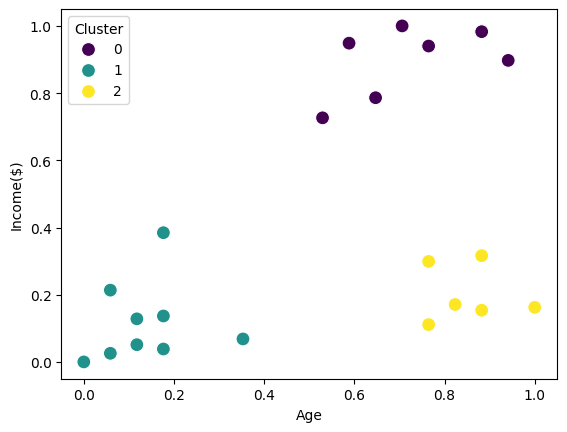

In [21]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

In [24]:
centroids = km.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

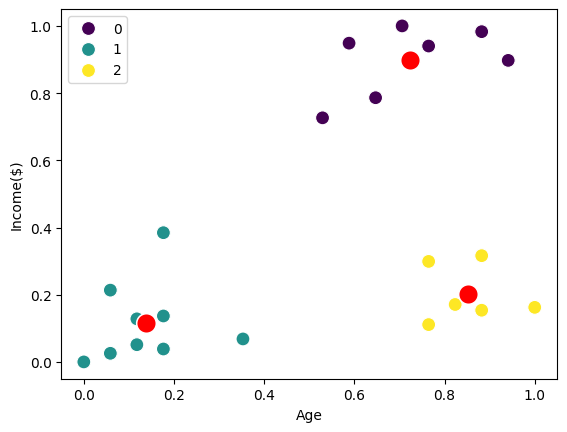

In [27]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],  s=200, color="red", marker='o')